In [ ]:
import pandas as pd

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('Air Quality1.csv')
print(df.head())

Saving Air Quality1.csv to Air Quality1.csv
              Datetime  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  2004-03-10 18:00:00     2.6         1360       150      11.9   
1  2004-03-10 19:00:00     2.0         1292       112       9.4   
2  2004-03-10 20:00:00     2.2         1402        88       9.0   
3  2004-03-10 21:00:00     2.2         1376        80       9.2   
4  2004-03-10 22:00:00     1.6         1272        51       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0           1046      166          1056      113          1692         1268   
1            955      103          1174       92          1559          972   
2            939      131          1140      114          1555         1074   
3            948      172          1092      122          1584         1203   
4            836      131          1205      116          1490         1110   

      T    RH      AH  
0  13.6  48.9  0.7578  
1  13.3  47.7  0.7255  
2  11.

In [12]:
print("Number of rows and columns:", df.shape)

Number of rows and columns: (9357, 14)


**#MISSING VALUE**

In [13]:
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 Datetime         0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


#DELETING MISSING VALUES

In [14]:
df_cleaned = df.dropna()
print("Cleaned dataset shape:", df_cleaned.shape)

Cleaned dataset shape: (9357, 14)


#DELETING UNWANTED ROWS AND COLUMNS

In [15]:
df_cleaned = df_cleaned.dropna(subset=['Datetime'])
unwanted_columns = [col for col in ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'NMHC(GT)'] if col in df_cleaned.columns]
df_cleaned = df_cleaned.drop(columns=unwanted_columns)
print("Cleaned dataset shape after removing unwanted columns:", df_cleaned.shape)

Cleaned dataset shape after removing unwanted columns: (9357, 8)


#OUTLIER DETECTION AND CORRELATION

In [16]:
Q1 = df_cleaned['CO(GT)'].quantile(0.25)
Q3 = df_cleaned['CO(GT)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df_cleaned[(df_cleaned['CO(GT)'] < lower_bound) | (df_cleaned['CO(GT)'] > upper_bound)]
print("Number of CO(GT) outliers:", len(outliers))
print("Sample outliers:\n", outliers[['Datetime', 'CO(GT)']].head())
correlation = df_cleaned[['CO(GT)', 'NOx(GT)', 'NO2(GT)', 'T', 'RH']].corr()
print("Correlation Matrix:\n", correlation)

Number of CO(GT) outliers: 1898
Sample outliers:
                Datetime  CO(GT)
10  2004-03-11 04:00:00  -200.0
25  2004-03-11 19:00:00     6.9
26  2004-03-11 20:00:00     6.1
34  2004-03-12 04:00:00  -200.0
39  2004-03-12 09:00:00  -200.0
Correlation Matrix:
            CO(GT)   NOx(GT)   NO2(GT)         T        RH
CO(GT)   1.000000  0.526451  0.671127 -0.068939 -0.048227
NOx(GT)  0.526451  1.000000  0.817139 -0.138452 -0.053009
NO2(GT)  0.671127  0.817139  1.000000 -0.084104 -0.081305
T       -0.068939 -0.138452 -0.084104  1.000000  0.885911
RH      -0.048227 -0.053009 -0.081305  0.885911  1.000000


#EDA(EXPLORATORY DATA ANALYSIS)


Summary Statistics:
             CO(GT)     C6H6(GT)      NOx(GT)      NO2(GT)            T  \
count  9357.000000  9357.000000  9357.000000  9357.000000  9357.000000   
mean    -34.207524     1.865683   168.616971    58.148873     9.778305   
std      77.657170    41.380206   257.433866   126.940455    43.203623   
min    -200.000000  -200.000000  -200.000000  -200.000000  -200.000000   
25%       0.600000     4.000000    50.000000    53.000000    10.900000   
50%       1.500000     7.900000   141.000000    96.000000    17.200000   
75%       2.600000    13.600000   284.000000   133.000000    24.100000   
max      11.900000    63.700000  1479.000000   340.000000    44.600000   

                RH           AH  
count  9357.000000  9357.000000  
mean     39.485380    -6.837604  
std      51.216145    38.976670  
min    -200.000000  -200.000000  
25%      34.100000     0.692300  
50%      48.600000     0.976800  
75%      61.900000     1.296200  
max      88.700000     2.231000  
Missin

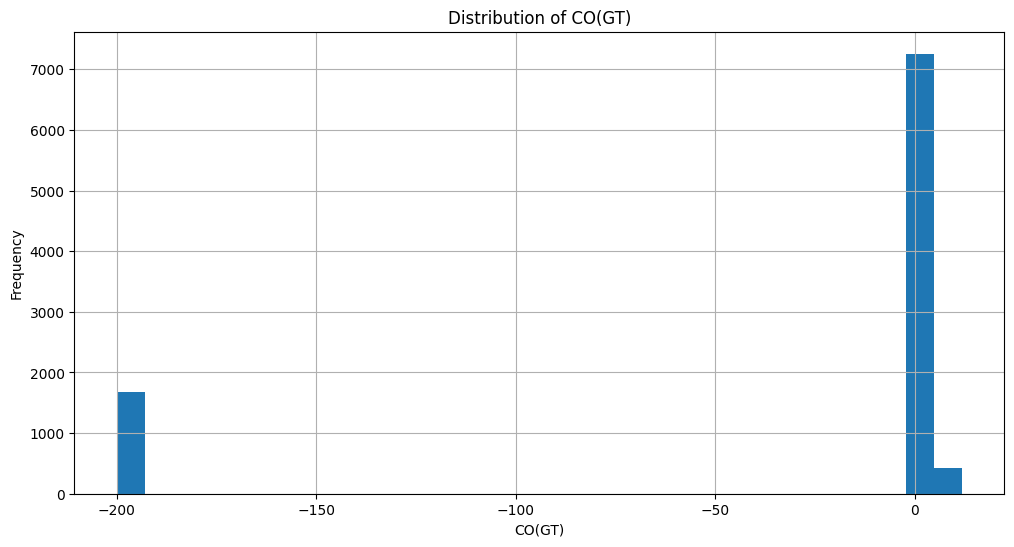

In [17]:
print("Summary Statistics:\n", df_cleaned.describe())
print("Missing values per column:\n", df_cleaned.isnull().sum())
df_cleaned['Datetime'] = pd.to_datetime(df_cleaned['Datetime'])
df_cleaned['Hour'] = df_cleaned['Datetime'].dt.hour
df_cleaned['Month'] = df_cleaned['Datetime'].dt.month
pollutant_stats_by_hour = df_cleaned.groupby('Hour')[['CO(GT)', 'NOx(GT)', 'NO2(GT)']].mean()
pollutant_stats_by_month = df_cleaned.groupby('Month')[['CO(GT)', 'NOx(GT)', 'NO2(GT)']].mean()
print("Pollutant Levels by Hour:\n", pollutant_stats_by_hour)
print("Pollutant Levels by Month:\n", pollutant_stats_by_month)
plt.figure(figsize=(12, 6))
df_cleaned['CO(GT)'].hist(bins=30)
plt.title('Distribution of CO(GT)')
plt.xlabel('CO(GT)')
plt.ylabel('Frequency')
plt.show()

#SCATTER PLOT

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['T'], df_cleaned['CO(GT)'], c=df_cleaned['RH'], cmap='viridis')
plt.xlabel('Temperature (T)')
plt.ylabel('CO(GT)')
plt.title('Scatter Plot: CO(GT) vs Temperature with RH as Color')
plt.colorbar(label='Relative Humidity (RH)')
plt.show()

#HIST PLOT

In [19]:
plt.figure(figsize=(10, 6))
df_cleaned['CO(GT)'].hist(bins=30)
plt.xlabel('CO(GT)')
plt.ylabel('Frequency')
plt.title('Histogram of CO(GT)')
plt.show()

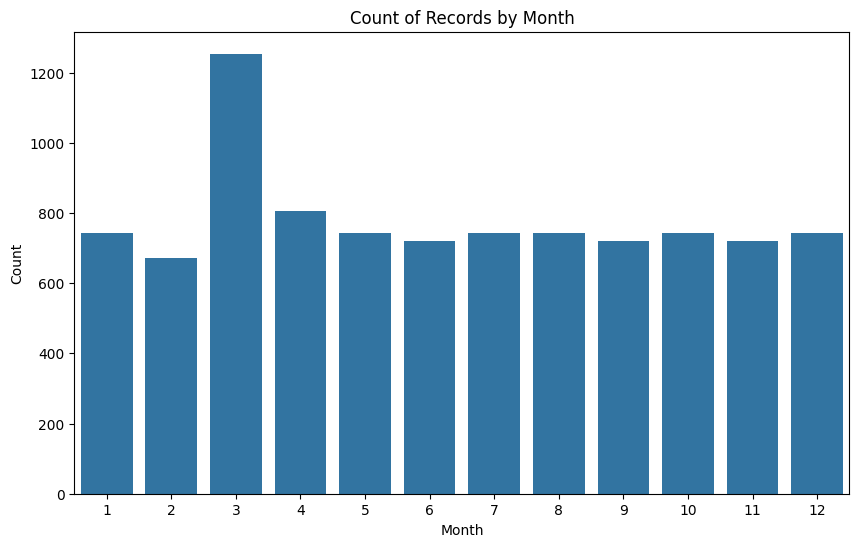

In [36]:

df = pd.read_csv('Air Quality1.csv')
df_cleaned = df.dropna()
df_cleaned = df_cleaned.drop(columns=['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'NMHC(GT)'])
df_cleaned['Datetime'] = pd.to_datetime(df_cleaned['Datetime'])
df_cleaned['Month'] = df_cleaned['Datetime'].dt.month
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', data=df_cleaned)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count of Records by Month')
plt.show()

#BAR PLOT

In [20]:
plt.figure(figsize=(10, 6))
df_cleaned.groupby('Hour')['CO(GT)'].mean().plot(kind='bar')
plt.xlabel('Hour of Day')
plt.ylabel('Average CO(GT)')
plt.title('Average CO(GT) by Hour')
plt.show()

#PAIR PLOT

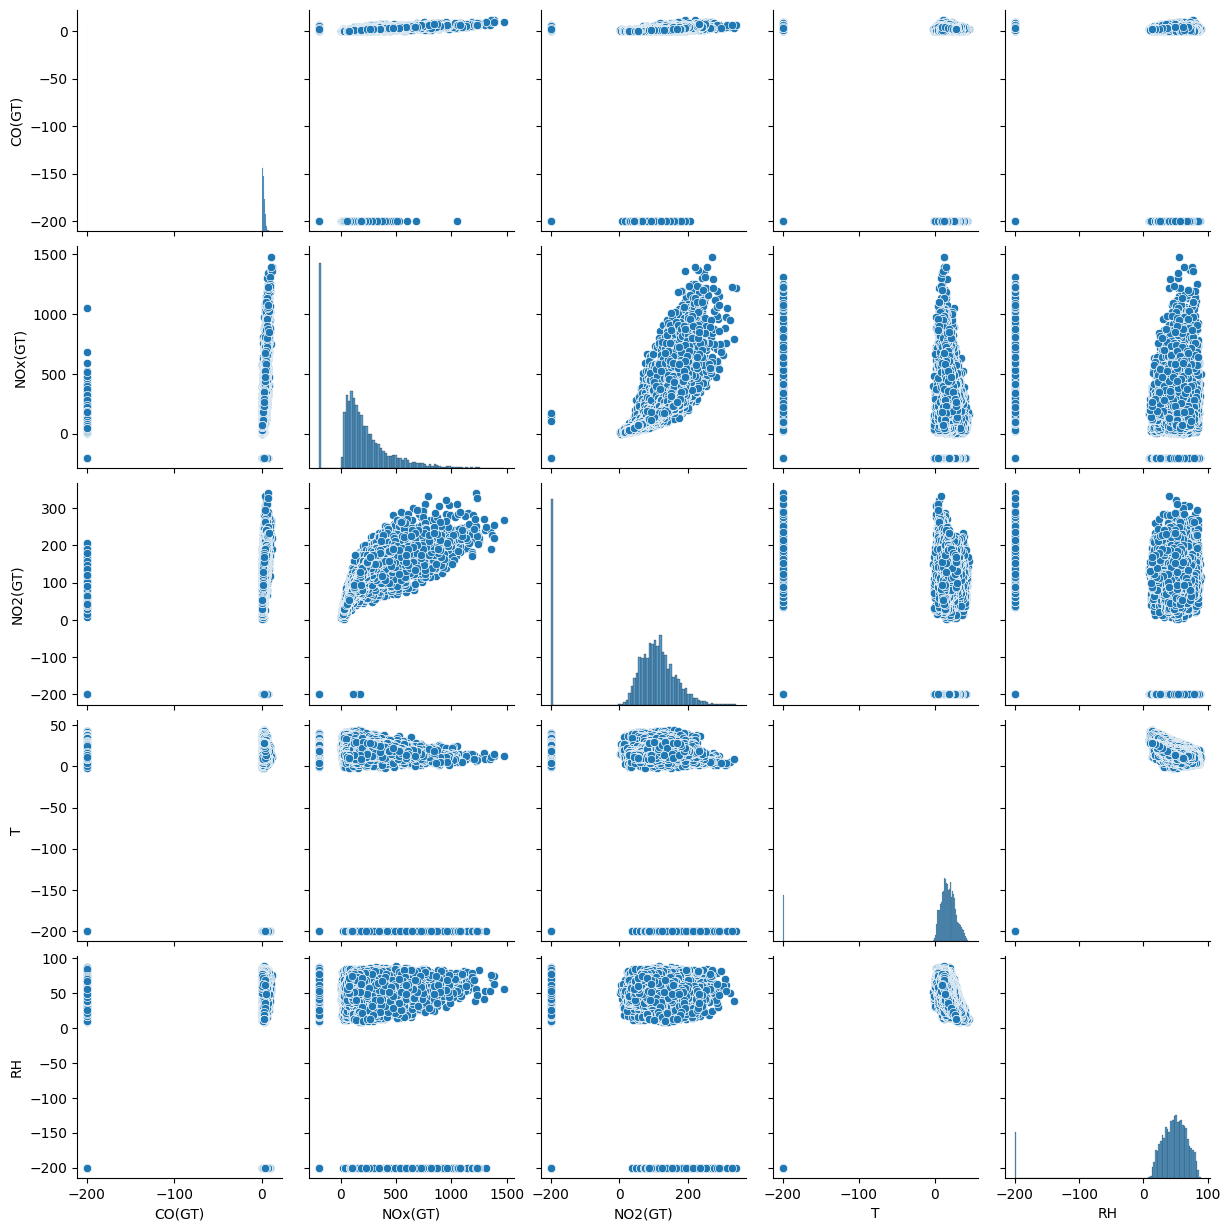

In [34]:
df = pd.read_csv('Air Quality1.csv')
df_cleaned = df.dropna()
df_cleaned = df_cleaned.drop(columns=['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'NMHC(GT)'])
sns.pairplot(df_cleaned[['CO(GT)', 'NOx(GT)', 'NO2(GT)', 'T', 'RH']])
plt.show()

#BOX PLOT

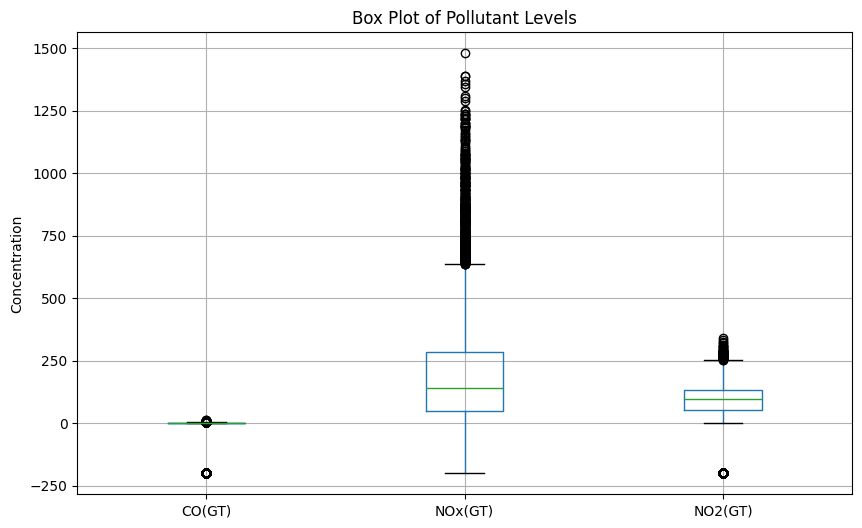

In [24]:
plt.figure(figsize=(10, 6))
df_cleaned.boxplot(column=['CO(GT)', 'NOx(GT)', 'NO2(GT)'])
plt.ylabel('Concentration')
plt.title('Box Plot of Pollutant Levels')
plt.show()


#LINE PLOT

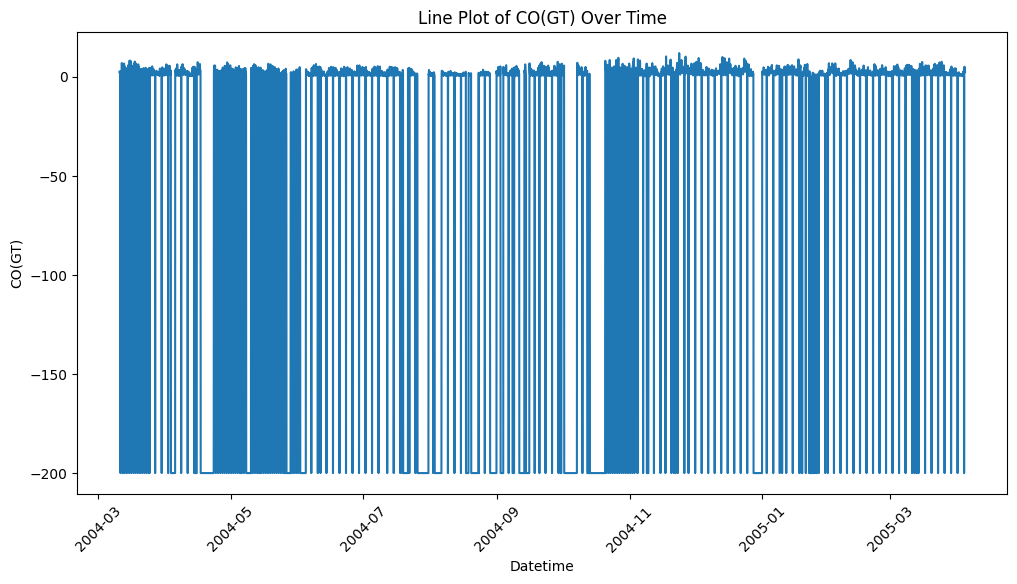

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned['Datetime'], df_cleaned['CO(GT)'])
plt.xlabel('Datetime')
plt.ylabel('CO(GT)')
plt.title('Line Plot of CO(GT) Over Time')
plt.xticks(rotation=45)
plt.show()

#PIE CHART

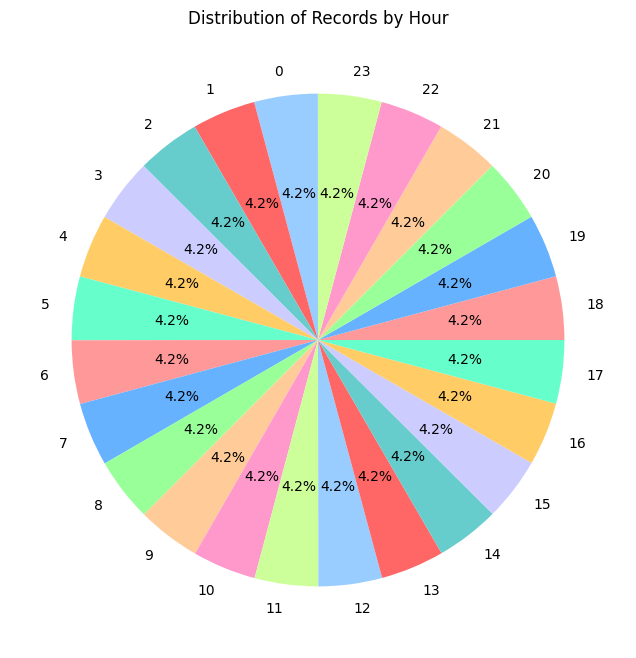

In [27]:
plt.figure(figsize=(8, 8))
hourly_counts = df_cleaned['Hour'].value_counts()
plt.pie(hourly_counts, labels=hourly_counts.index, autopct='%1.1f%%', colors=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99CC', '#CCFF99', '#99CCFF', '#FF6666', '#66CCCC', '#CCCCFF', '#FFCC66', '#66FFCC'])
plt.title('Distribution of Records by Hour')
plt.show()

#BAR CHART

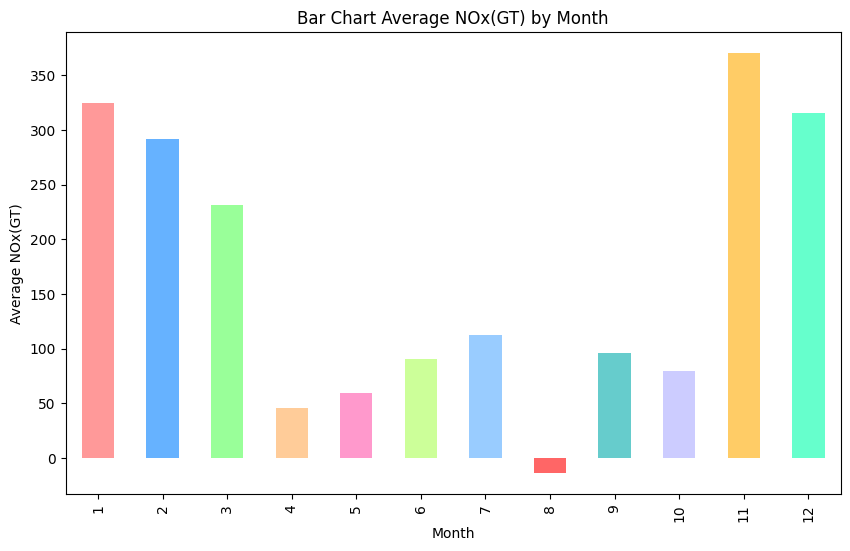

In [29]:
plt.figure(figsize=(10, 6))
df_cleaned.groupby('Month')['NOx(GT)'].mean().plot(kind='bar', color=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99CC', '#CCFF99', '#99CCFF', '#FF6666', '#66CCCC', '#CCCCFF', '#FFCC66', '#66FFCC'])
plt.xlabel('Month')
plt.ylabel('Average NOx(GT)')
plt.title('Bar Chart Average NOx(GT) by Month')
plt.show()

#GROUPED BAR CHART

In [30]:
plt.figure(figsize=(12, 6))
pollutants_by_month = df_cleaned.groupby('Month')[['CO(GT)', 'NOx(GT)', 'NO2(GT)']].mean()
pollutants_by_month.plot(kind='bar', color=['#FF9999', '#66B2FF', '#99FF99'])
plt.xlabel('Month')
plt.ylabel('Average Concentration')
plt.title('Grouped bar chart Average Pollutant Levels by Month')
plt.show()

<Figure size 1200x600 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 6))
max_col = df_cleaned[['CO(GT)', 'NOx(GT)', 'NO2(GT)']].mean().idxmax()
df_cleaned[max_col].hist(bins=30, color='#FF9999', edgecolor='black')
plt.xlabel(max_col)
plt.ylabel('Frequency')
plt.title(f'Histogram of {max_col} (Highest Mean)')
plt.grid(True, alpha=0.3)
plt.show()

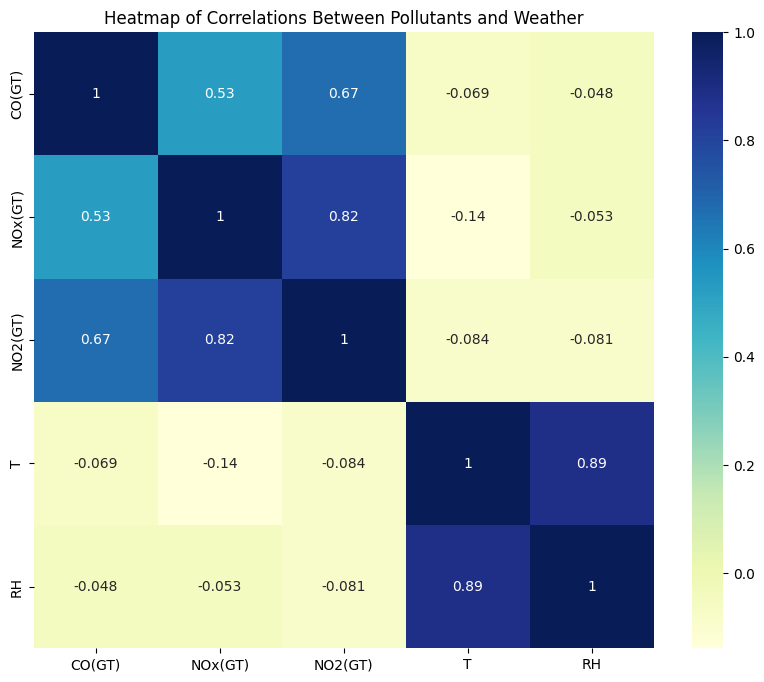

In [ ]:
plt.figure(figsize=(10, 8))
correlation = df_cleaned[['CO(GT)', 'NOx(GT)', 'NO2(GT)', 'T', 'RH']].corr()
sns.heatmap(correlation, annot=True, cmap='YlGnBu')
plt.title('Heatmap of Correlations Between Pollutants and Weather')
plt.show()

In [ ]:
print("Cleaned Data (First 5 rows):\n", df_cleaned.head())
print("Cleaned Data Shape:", df_cleaned.shape)
print("Cleaned Data without Correlation:\n", df_cleaned.head())
correlation = df_cleaned[['CO(GT)', 'NOx(GT)', 'NO2(GT)', 'T', 'RH']].corr()
print("Cleaned Data with Correlation:\n", df_cleaned.head())
print("Correlation Matrix:\n", correlation)

Cleaned Data (First 5 rows):
              Datetime  CO(GT)  C6H6(GT)  NOx(GT)  NO2(GT)     T    RH      AH  \
0 2004-03-10 18:00:00     2.6      11.9      166      113  13.6  48.9  0.7578   
1 2004-03-10 19:00:00     2.0       9.4      103       92  13.3  47.7  0.7255   
2 2004-03-10 20:00:00     2.2       9.0      131      114  11.9  54.0  0.7502   
3 2004-03-10 21:00:00     2.2       9.2      172      122  11.0  60.0  0.7867   
4 2004-03-10 22:00:00     1.6       6.5      131      116  11.2  59.6  0.7888   

   Hour  Month  
0    18      3  
1    19      3  
2    20      3  
3    21      3  
4    22      3  
Cleaned Data Shape: (9357, 10)
Cleaned Data without Correlation:
              Datetime  CO(GT)  C6H6(GT)  NOx(GT)  NO2(GT)     T    RH      AH  \
0 2004-03-10 18:00:00     2.6      11.9      166      113  13.6  48.9  0.7578   
1 2004-03-10 19:00:00     2.0       9.4      103       92  13.3  47.7  0.7255   
2 2004-03-10 20:00:00     2.2       9.0      131      114  11.9  54.0  0

Daily Trend (Average CO(GT)):
 Day
Friday      -24.583259
Monday      -30.063820
Saturday    -27.126414
Sunday      -35.432292
Thursday    -35.806176
Tuesday     -41.773864
Wednesday   -44.917647
Name: CO(GT), dtype: float64
Weekly Trend (Average CO(GT)):
 Week
1      -1.194643
2      -2.214881
3     -37.417262
4     -30.094643
5      -1.322619
6       0.129167
7      -0.692262
8      -1.536310
9      -0.669048
10    -12.601786
11     -3.613333
12     -2.905952
13     -2.515774
14    -43.156831
15    -12.383929
16    -77.116071
17   -121.759524
18     -6.100595
19    -59.227381
20    -16.994643
21     -6.370833
22    -85.063095
23    -83.601786
24     -1.607143
25     -1.811310
26     -0.532738
27     -0.485119
28     -0.565476
29     -1.711310
30    -67.948214
31   -144.870238
32    -90.924405
33     -2.418452
34   -123.363690
35    -52.547024
36    -81.014881
37    -78.573214
38    -59.333929
39     -1.312500
40    -76.947024
41   -104.800000
42   -157.898810
43    -79.193452
44     

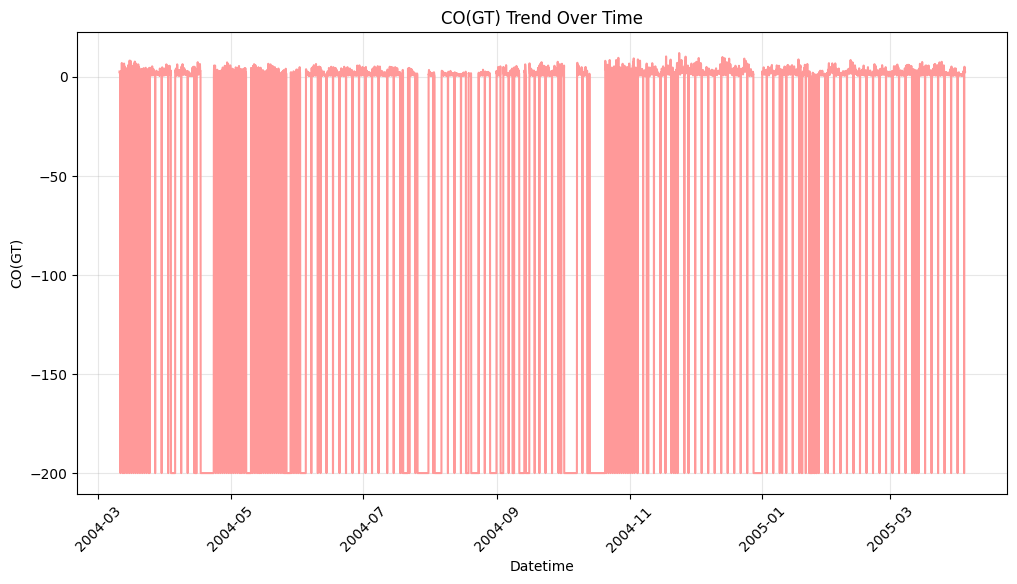

Pollution Spikes (Top 5% CO(GT)):
               Datetime  CO(GT)
24 2004-03-11 18:00:00     4.8
25 2004-03-11 19:00:00     6.9
26 2004-03-11 20:00:00     6.1
50 2004-03-12 20:00:00     6.6
53 2004-03-12 23:00:00     5.4


In [ ]:
df_cleaned['Datetime'] = pd.to_datetime(df_cleaned['Datetime'])
df_cleaned['Day'] = df_cleaned['Datetime'].dt.day_name()
df_cleaned['Week'] = df_cleaned['Datetime'].dt.isocalendar().week
daily_trend = df_cleaned.groupby('Day')['CO(GT)'].mean()
weekly_trend = df_cleaned.groupby('Week')['CO(GT)'].mean()
monthly_trend = df_cleaned.groupby('Month')['CO(GT)'].mean()
print("Daily Trend (Average CO(GT)):\n", daily_trend)
print("Weekly Trend (Average CO(GT)):\n", weekly_trend)
print("Monthly Trend (Average CO(GT)):\n", monthly_trend)
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned['Datetime'], df_cleaned['CO(GT)'], color='#FF9999')
plt.xlabel('Datetime')
plt.ylabel('CO(GT)')
plt.title('CO(GT) Trend Over Time')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()
spikes = df_cleaned[df_cleaned['CO(GT)'] > df_cleaned['CO(GT)'].quantile(0.95)]
print("Pollution Spikes (Top 5% CO(GT)):\n", spikes[['Datetime', 'CO(GT)']].head())
plt.figure(figsize=(12, 6))
daily_trend.plot(kind='bar', color=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99CC', '#CCFF99', '#99CCFF'])
plt.xlabel('Day')
plt.ylabel('Average CO(GT)')
plt.title('Average CO(GT) by Day')
plt.show()
plt.figure(figsize=(12, 6))
monthly_trend.plot(kind='bar', color=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99CC', '#CCFF99', '#99CCFF', '#FF6666', '#66CCCC', '#CCCCFF', '#FFCC66', '#66FFCC'])
plt.xlabel('Month')
plt.ylabel('Average CO(GT)')
plt.title('Average CO(GT) by Month')
plt.show()

In [ ]:
summary_stats = df_cleaned[['CO(GT)', 'NOx(GT)', 'NO2(GT)', 'C6H6(GT)', 'T', 'RH', 'AH']].describe()
print("Summary Statistics of Pollutants and Weather Parameters:\n", summary_stats)

Summary Statistics of Pollutants and Weather Parameters:
             CO(GT)      NOx(GT)      NO2(GT)     C6H6(GT)            T  \
count  9357.000000  9357.000000  9357.000000  9357.000000  9357.000000   
mean    -34.207524   168.616971    58.148873     1.865683     9.778305   
std      77.657170   257.433866   126.940455    41.380206    43.203623   
min    -200.000000  -200.000000  -200.000000  -200.000000  -200.000000   
25%       0.600000    50.000000    53.000000     4.000000    10.900000   
50%       1.500000   141.000000    96.000000     7.900000    17.200000   
75%       2.600000   284.000000   133.000000    13.600000    24.100000   
max      11.900000  1479.000000   340.000000    63.700000    44.600000   

                RH           AH  
count  9357.000000  9357.000000  
mean     39.485380    -6.837604  
std      51.216145    38.976670  
min    -200.000000  -200.000000  
25%      34.100000     0.692300  
50%      48.600000     0.976800  
75%      61.900000     1.296200  
max

#LINEAR REGRESSION


RMSE: 76.73359268742773
MSE: 5888.044246720063
R² Score: 0.0033981338826659657


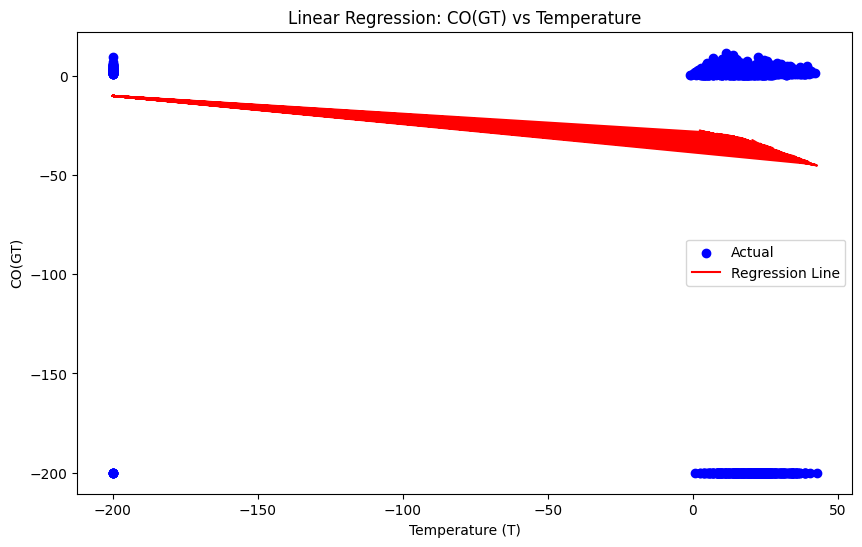

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df_ml = df_cleaned[['T', 'RH', 'CO(GT)']].dropna()
X = df_ml[['T', 'RH']]
y = df_ml['CO(GT)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
r2 = model.score(X_test, y_test)
print("RMSE:", rmse)
print("MSE:", mse)
print("R² Score:", r2)
plt.figure(figsize=(10, 6))
plt.scatter(X_test['T'], y_test, color='blue', label='Actual')
plt.plot(X_test['T'], y_pred, color='red', label='Regression Line')
plt.xlabel('Temperature (T)')
plt.ylabel('CO(GT)')
plt.title('Linear Regression: CO(GT) vs Temperature')
plt.legend()
plt.show()